In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2024-04-02 / Aki Taanila


# Aikasarjojen kuvailua ja analysointia

Tässä muistiossa noudetaan dataa Yahoo Finance -palvelusta **yfinance**-kirjaston avulla. **yfinance**-kirjaston asennus Minicondan ja Anacondan käyttäjille komentorivin kautta: `conda install -c conda-forge yfinance`. Lisätietoa https://github.com/ranaroussi/yfinance.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tätä tarvitaan datan noutamiseen Yahoo Finance -palvelusta
import yfinance as yf

# Tyyli vaikuttaa grafiikan ulkoasuun
sns.set_style('darkgrid')

## Datojen nouto

Yahoo Finance -palvelu https://finance.yahoo.com/ sisältää tietoa osakkeista, valuutoista, raaka-aineista jne. Jos esimerkiksi haen palvelusta hakusanalla **elisa**, niin minulle selviää, että Elisan tunnus on **ELISA.HE**. Vastaavasti Telian tunnukseksi löydän **TELIA1.HE**. Seuraavassa haen Elisan ja Telian osakkeiden historiatietoja tähän päivään saakka.

Joka kerta kun suoritan koodin, saan mukaan myös tuoreimmat tiedot.

In [3]:
elisa = yf.download('ELISA.HE', start='2018-1-1')
telia = yf.download('TELIA1.HE', start='2018-1-1')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Datan alku- ja loppuosa
elisa

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,32.970001,33.070000,32.689999,32.860001,25.996548,357134
2018-01-03,32.840000,33.070000,32.599998,32.689999,25.862055,348571
2018-01-04,32.770000,32.820000,32.660000,32.750000,25.909523,430650
2018-01-05,32.750000,32.970001,32.680000,32.910000,26.036102,443343
2018-01-08,32.930000,33.320000,32.930000,33.060001,26.154774,383662
...,...,...,...,...,...,...
2024-03-25,42.619999,42.820000,42.220001,42.779999,42.779999,218216
2024-03-26,42.779999,42.959999,42.330002,42.790001,42.790001,308153
2024-03-27,41.500000,42.500000,41.130001,41.490002,41.490002,655587


In [5]:
# Datan alku- ja loppuosa
telia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,3.750,3.752,3.718,3.729,0.035426,1717521
2018-01-03,3.758,3.758,3.730,3.755,0.035673,1823437
2018-01-04,3.760,3.786,3.756,3.780,0.035910,1540541
2018-01-05,3.780,3.850,3.777,3.850,0.036576,1306020
2018-01-08,3.850,3.860,3.824,3.845,0.036528,2151101
...,...,...,...,...,...,...
2024-03-25,2.340,2.363,2.339,2.354,2.354000,571943
2024-03-26,2.354,2.377,2.340,2.369,2.369000,607354
2024-03-27,2.375,2.398,2.365,2.374,2.374000,554924


## Viivakaavioita

<Axes: title={'center': 'Telia'}, xlabel='Date'>

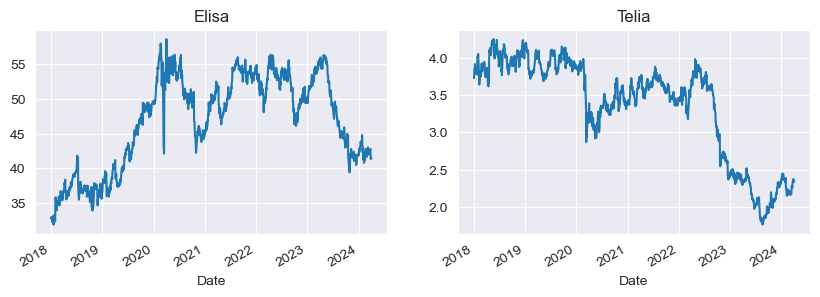

In [6]:
# Osakkeen hinnan kehitys koko aikavälillä
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].plot(ax=axs[0], title='Elisa')
telia['Close'].plot(ax=axs[1], title='Telia')

<Axes: title={'center': 'Telia'}, xlabel='Date'>

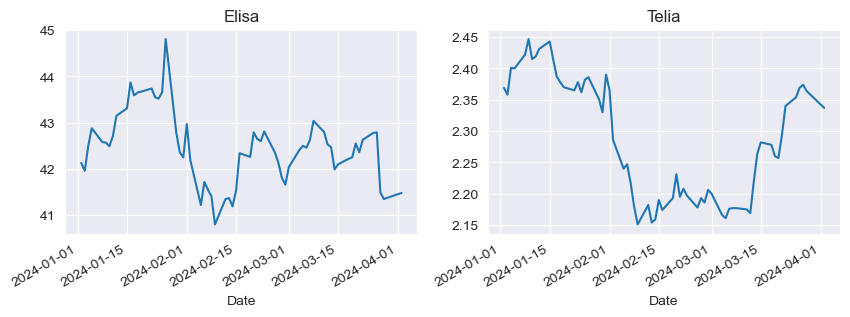

In [7]:
# Kehitys vuoden 2024 alusta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close']['2024':].plot(ax=axs[0], title='Elisa')
telia['Close']['2024':].plot(ax=axs[1], title='Telia')

## Aggregointi

**resample**-funktio aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample-funktion parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<Axes: title={'center': 'Telia'}, xlabel='Date'>

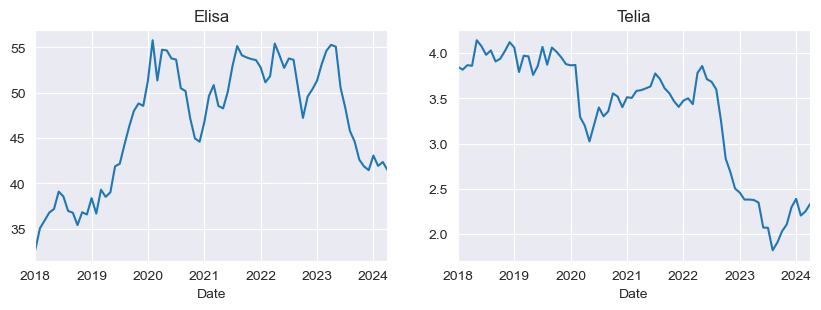

In [8]:
# Päivän päätöshintojen aggregointi kuukausitasolle keskiarvoja (mean) käyttäen
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('ME').mean().plot(ax=axs[0], title='Elisa')
telia['Close'].resample('ME').mean().plot(ax=axs[1], title='Telia')

<Axes: title={'center': 'Telia'}, xlabel='Date'>

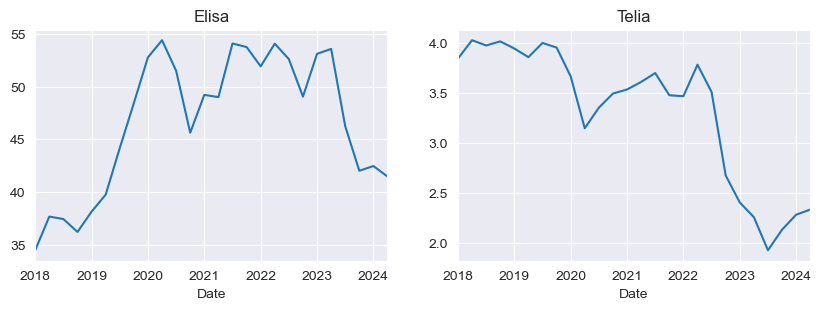

In [9]:
# Päivän päätöshintojen aggregointi vuosineljännestasolle keskiarvoja käyttäen
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('QE').mean().plot(ax=axs[0], title='Elisa')
telia['Close'].resample('QE').mean().plot(ax=axs[1], title='Telia')

<Axes: title={'center': 'Telia'}, xlabel='Date'>

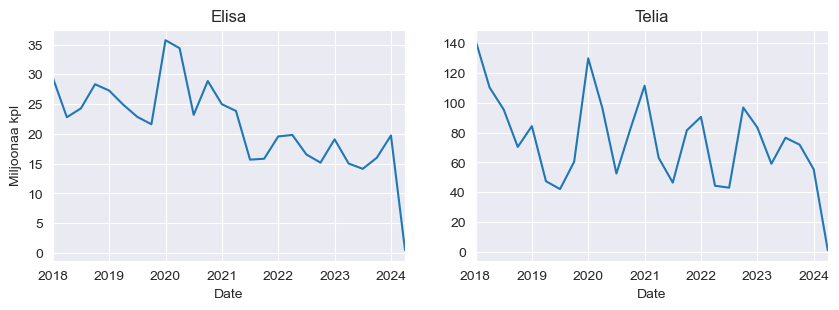

In [10]:
# Osakkeiden vaihdon määrät (kpl) vuosineljänneksittäin (aggregointi summaa käyttäen)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(elisa['Volume']/1000000).resample('QE').sum().plot(ax=axs[0], title='Elisa', ylabel='Miljoonaa kpl')
(telia['Volume']/1000000).resample('QE').sum().plot(ax=axs[1], title='Telia')

## Liukuvia keskiarvoja

Liukuvilla keskiarvoilla tasoitetaan satunnaisia piikkejä. Liukuvien tunnuslukujen laskenta onnistuu **rolling**-funktiolla.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.
Lisätietoa https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

<Axes: title={'center': 'Elisa - 50 ja 200 päivän liukuvat keskiarvot'}, xlabel='Date'>

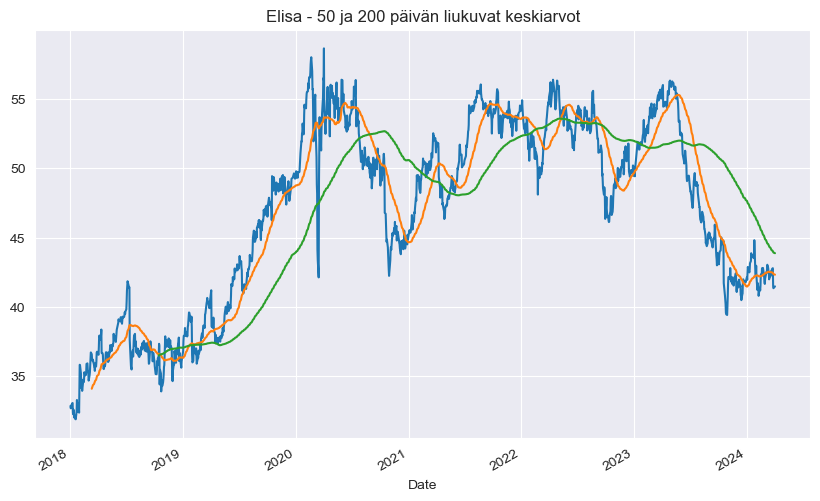

In [11]:
# Elisan päätöshinnat
elisa['Close'].plot(figsize=(10, 6), title='Elisa - 50 ja 200 päivän liukuvat keskiarvot')

# Elisan päätöshintojen 50 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot()

# Elisan päätöshintojen 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(200).mean().plot()

<Axes: title={'center': 'Telia - 50 ja 200 päivän liukuvat keskiarvot'}, xlabel='Date'>

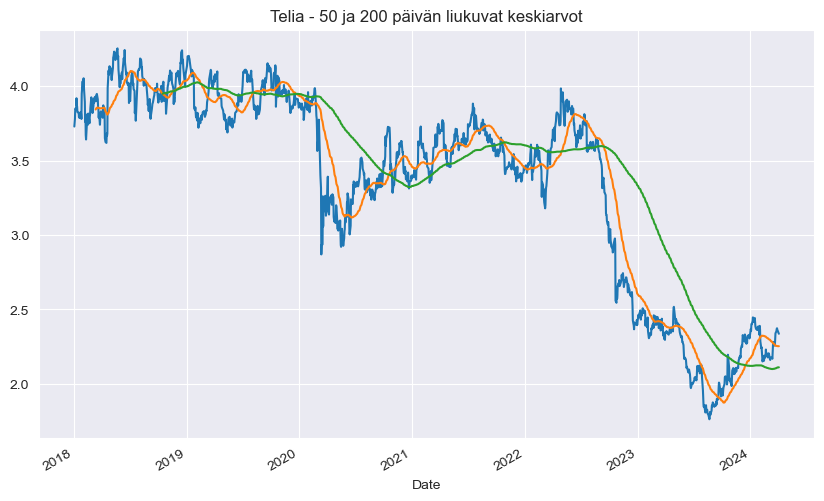

In [12]:
# Telian päätöshinnat
telia['Close'].plot(figsize=(10, 6), title='Telia - 50 ja 200 päivän liukuvat keskiarvot')

# Telian päätöshintojen 50 päivän liukuvat keskiarvot
telia['Close'].rolling(50).mean().plot()

# Telian päätöshintojen 200 päivän liukuvat keskiarvot
telia['Close'].rolling(200).mean().plot()

## Tuottoprosentit

Tuottoprosentit lasketaan **pct_change**-funktiolla. Tulos on desimaalimuodossa; tarvittaessa saan prosenttiluvut kertomalla luvulla 100.

In [13]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

# Tarkistetaan laskennan onnistuminen
elisa

,Open,High,Low,Close,Adj Close,Volume,Elisa%
Date,,,,,,,
2018-01-02,32.970001,33.070000,32.689999,32.860001,25.996548,357134,NaN
2018-01-03,32.840000,33.070000,32.599998,32.689999,25.862055,348571,-0.005174
2018-01-04,32.770000,32.820000,32.660000,32.750000,25.909523,430650,0.001835
2018-01-05,32.750000,32.970001,32.680000,32.910000,26.036102,443343,0.004885
2018-01-08,32.930000,33.320000,32.930000,33.060001,26.154774,383662,0.004558
...,...,...,...,...,...,...,...
2024-03-25,42.619999,42.820000,42.220001,42.779999,42.779999,218216,0.003519
2024-03-26,42.779999,42.959999,42.330002,42.790001,42.790001,308153,0.000234
2024-03-27,41.500000,42.500000,41.130001,41.490002,41.490002,655587,-0.030381


In [14]:
# Tarkistetaan laskennan onnistuminen myös Telian kohdalta
telia

,Open,High,Low,Close,Adj Close,Volume,Telia%
Date,,,,,,,
2018-01-02,3.750,3.752,3.718,3.729,0.035426,1717521,NaN
2018-01-03,3.758,3.758,3.730,3.755,0.035673,1823437,0.006972
2018-01-04,3.760,3.786,3.756,3.780,0.035910,1540541,0.006658
2018-01-05,3.780,3.850,3.777,3.850,0.036576,1306020,0.018519
2018-01-08,3.850,3.860,3.824,3.845,0.036528,2151101,-0.001299
...,...,...,...,...,...,...,...
2024-03-25,2.340,2.363,2.339,2.354,2.354000,571943,0.005983
2024-03-26,2.354,2.377,2.340,2.369,2.369000,607354,0.006372
2024-03-27,2.375,2.398,2.365,2.374,2.374000,554924,0.002111


**Logaritmiset tuotot**

Usein tuottoprosentin sijasta käytetään logaritmisia tuottoja. Logaritminen tuotto saadaan jakamalla päivän hinta edellisen päivän hinnalla ja ottamalla tuloksesta luonnollinen logaritmi. Logaritmiset tuotot eivät poikkea kovin paljoa tuottoprosenteista, mutta niillä on puolellaan kaksi etua:

* Ne noudattavat paremmin normaalijakaumaa kuin tuottoprosentit ja tästä on hyötyä tilastollisissa analyyseissä.
* Logaritmiset tuotot ovat additiviivisia. Peräkkäisten jaksojen tuottoprosenttien summa ei ole sama kuin jaksojen kokonaistuottoprosentti (esimerkiksi kahta peräkkäistä 10 % tuottoa vastaava kokonaistuotto on 21 %). Sen sijaan peräkkäisten logaritmisten tuottojen summa on sama kuin jaksojen logaritminen kokonaistuotto.

Logaritmiset tuotot voit laskea korvaamalla edellisen solun koodin seuraavalla:

`from numpy import log`<br>
`elisa['Elisa%'] = log(elisa['Close'].pct_change() + 1)`<br>
`telia['Telia%'] = log(telia['Close'].pct_change() + 1)`


In [15]:
# Muodostan Elisan ja Telian tuottoprosenteista uuden datan
tuotot = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)

# Jos päätöshinnoissa on puuttuvia arvoja (kauppaa ei ole käyty), niin tuottoprosenteissakin on puuttuvia arvoja
# Ne kannattaa korvata tuottoprosentilla 0 käyttäen fillna-toimintoa
tuotot = tuotot.fillna(0)

# Tarkistetaan lopputulos
tuotot

,Elisa%,Telia%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,-0.005174,0.006972
2018-01-04,0.001835,0.006658
2018-01-05,0.004885,0.018519
2018-01-08,0.004558,-0.001299
...,...,...
2024-03-25,0.003519,0.005983
2024-03-26,0.000234,0.006372
2024-03-27,-0.030381,0.002111


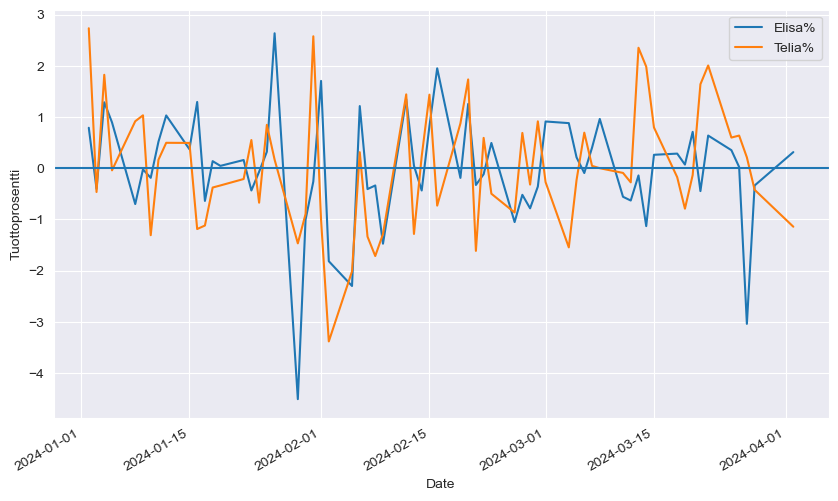

In [16]:
# Elisan ja Telian päivittäiset tuottoprosentit vuoden 2024 alusta
(tuotot['2024':]*100).plot(figsize=(10, 6))

plt.ylabel('Tuottoprosentti')

# Vaakaviiva nollan kohdalle; tuottoprosentit vaihtelevat nollan molemmin puolin
plt.axhline()

In [17]:
# Tilastollisia tunnuslukuja tuottoprosenteille
(tuotot*100).describe().round(2)

,Elisa%,Telia%
count,1572.00,1572.00
mean,0.02,-0.02
std,1.34,1.45
min,-9.22,-13.45
25%,-0.60,-0.71
50%,0.05,0.02
75%,0.71,0.73
max,16.40,11.00


Text(0, 0.5, 'Tuottoprosentti')

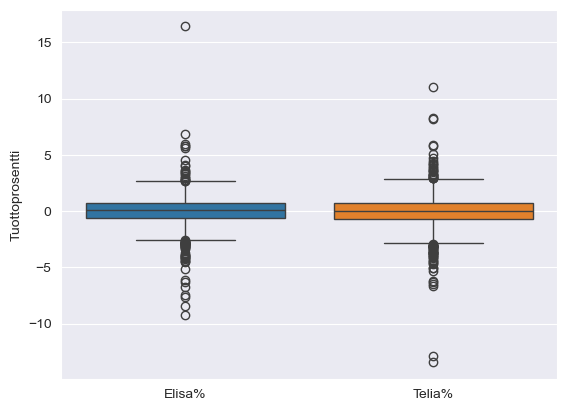

In [18]:
# Tunnuslukujen vertailua graafisesti
sns.boxplot(data=tuotot*100)
plt.ylabel('Tuottoprosentti')

In [19]:
# Päivät, jolloin tuottoprosentti on jommallakummalla osakkeella ollut suurempi kuin 6 %
tuotot[(abs(tuotot['Elisa%'])>0.06) | (abs(tuotot['Telia%'])>0.06)]

,Elisa%,Telia%
Date,,
2018-04-20,-0.001125,0.083107
2018-07-13,-0.092226,-0.009455
2018-10-18,-0.074751,-0.000496
2019-04-04,-0.063350,-0.007843
2019-10-17,0.068757,-0.062849
2020-03-09,-0.040785,-0.064356
2020-03-12,-0.084077,-0.134499
2020-03-17,0.164016,0.109976
2020-03-18,0.055873,-0.061963


## Tuottoprosenttien välinen korrelaatio

In [20]:
# Elisan ja Telian tuottoprosentit korreloivat positiivisesti
tuotot.corr()

,Elisa%,Telia%
Elisa%,1.000000,0.431305
Telia%,0.431305,1.000000


<Axes: xlabel='Elisa%', ylabel='Telia%'>

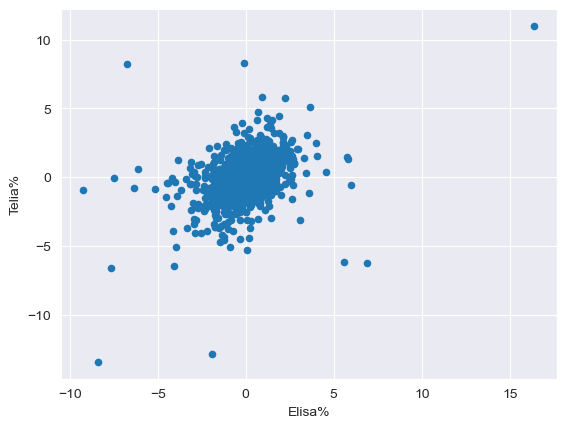

In [21]:
# Tuottoprosenttien välinen positiivinen korrelaatio näkyy myös hajontakaaviossa
(tuotot*100).plot(kind='scatter', x='Elisa%', y='Telia%')

<Axes: xlabel='Date'>

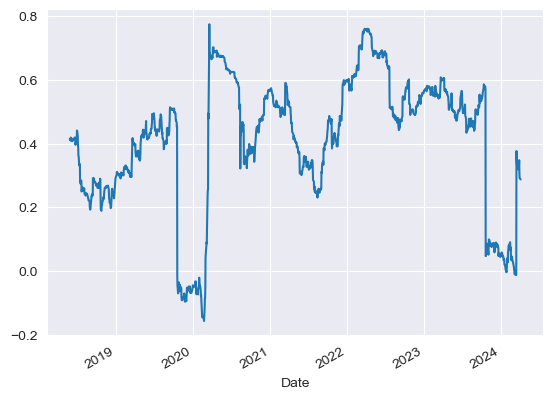

In [22]:
# Liukuva korrelaatio kertoo miten tuottoprosentit korreloivat eri aikoina
tuotot['Elisa%'].rolling(100).corr(tuotot['Telia%']).plot()

## Liukuva volatiliteetti

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti lasketaan päivittäisten tuottoprosenttien keskihajontana (std-funktiolla) ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella (sama kuin korotus potenssiin 0.5). Vuoteen sisältyvien kaupantekopäivien lukumääränä arvoa 252 vaikka kaupantekopäivien lukumäärässä on pientä vaihtelua vuosien välillä.

Liukuva volatiliteetti kuvaa, miten volatiliteetti (riski) on muuttunut ajan kuluessa.

<Axes: xlabel='Date'>

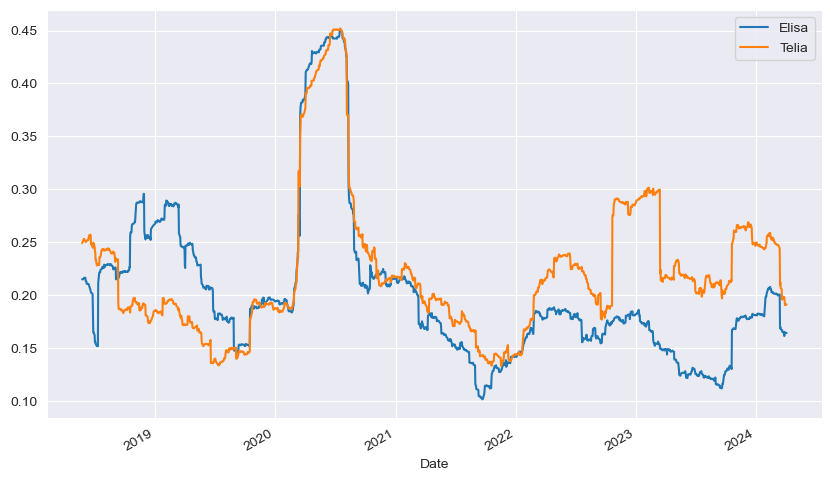

In [23]:
# 100 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(tuotot['Elisa%'].rolling(100).std() * (252**0.5)).plot(label='Elisa', legend=True)
(tuotot['Telia%'].rolling(100).std() * (252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

Elisan ja Telian päätöshinnat ovat eri suuruusluokkaa. Jos haluan kuvata ne päällekkäin samaan kaavioon, niin voin käyttää kahden arvoakselin kaaviota.

Seuraavassa käytän värimäärityksiä 'C0' ja 'C1', jotka tarkoittavat oletuspaletin ensimmäistä ja toista väriä. Lisätietoa väreistä https://matplotlib.org/stable/gallery/color/named_colors.html

Text(0.5, 1.0, 'Elisan ja Telian osakkeiden hinnan kehitys')

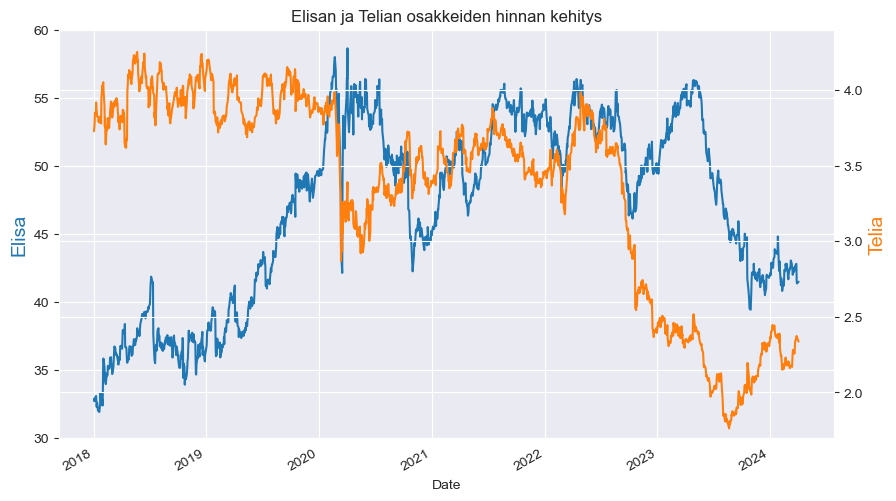

In [24]:
# Kuvion koko
plt.figure(figsize=(10, 6))

# Viivakaavio Elisan päätöshinnoista
eli = elisa['Close'].plot()

# Elisan nimi, väri ja fonttikoko
plt.ylabel('Elisa', color='C0', fontsize=14)

# Elisan arvoakselin skaalaus (luvut valitaan läheltä pienintä ja suurinta päätöshintaa)
plt.ylim(30, 60)

# Luon Telialle kaavion (tel), jolla on yhteinen x-akseli Elisan kaavion kanssa
tel = eli.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax=tel, color='C1')

# Telian nimi, väri ja fonttikoko
plt.ylabel('Telia', color='C1', fontsize=14)

# Telian arvoakselin skaalaus
plt.ylim(1.7, 4.4)

plt.title('Elisan ja Telian osakkeiden hinnan kehitys')

<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [25]:
viikonpaivat = ['ma', 'ti', 'ke', 'to', 'pe']

tuotot['Weekday'] = tuotot.index.weekday

df1 = (tuotot*100).groupby('Weekday')['Elisa%'].describe()
df1.index = viikonpaivat
df1

,count,mean,std,min,25%,50%,75%,max
ma,311.0,0.136724,1.176701,-4.507923,-0.552569,0.179344,0.809817,5.780507
ti,320.0,0.057452,1.452089,-3.897637,-0.598888,0.039883,0.670044,16.401613
ke,320.0,0.080110,1.182587,-3.867992,-0.510047,0.000000,0.682048,5.965581
to,315.0,-0.126377,1.476666,-8.407721,-0.722160,-0.037065,0.625209,6.875676
pe,306.0,-0.030384,1.388683,-9.222597,-0.529951,0.098562,0.741448,3.601623


In [26]:
# Testataan onko maanantain ja torstain välillä merkitsevää eroa

# Vertailtavien ryhmien muodostaminen
ma = tuotot['Elisa%'][tuotot['Weekday']==0]
to = tuotot['Elisa%'][tuotot['Weekday']==3]

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(ma, to, equal_var=False, nan_policy='omit')

TtestResult(statistic=2.466923381851679, pvalue=0.013907363265639622, df=597.4603194015284)

In [27]:
df2 = (tuotot*100).groupby('Weekday')['Telia%'].describe()
df2.index = viikonpaivat
df2

,count,mean,std,min,25%,50%,75%,max
ma,311.0,0.041419,1.333091,-6.435643,-0.658529,0.072846,0.827050,4.142419
ti,320.0,0.064468,1.397913,-4.492134,-0.636214,0.012793,0.713568,10.997615
ke,320.0,-0.008281,1.374410,-6.196316,-0.746788,-0.102493,0.737621,5.843288
to,315.0,-0.125379,1.587788,-13.449943,-0.766878,0.000000,0.598803,8.225973
pe,306.0,-0.069850,1.555245,-12.840602,-0.709853,0.052079,0.711185,8.310701


In [28]:
# Testataan onko tiistain ja torstain välillä merkitsevää eroa

# Vertailtavien ryhmien muodostaminen
ma = tuotot['Telia%'][tuotot['Weekday']==1]
to = tuotot['Telia%'][tuotot['Weekday']==3]

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(ma, to, equal_var=False, nan_policy='omit')

TtestResult(statistic=1.5982227588979852, pvalue=0.1105025320250038, df=620.4330481522459)

## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/